## Section 4.4 - Spectroscopic Calibration

1. Below is the image of the 3 slits from the spectrograph with a Neon arc lamp:

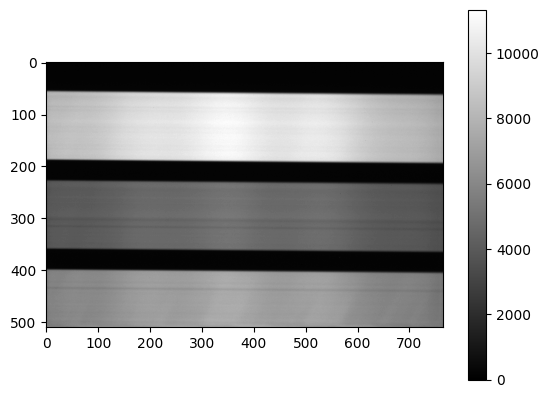

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

spectra_image = fits.open('../Lab_1/images/lab1_3_4_8.00000009.FIT')

data = spectra_image[0].data
plt.imshow(data,cmap='gray')
plt.colorbar()

(200, 765)


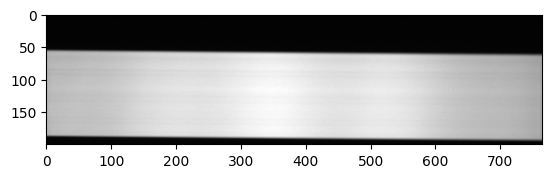

In [24]:
#Crop data to only include the top band (50um)

crop = data[:200,:]
print(crop.shape)
plt.imshow(crop,cmap='gray')

In [78]:
flat_list = []

# find and open the Flat Fields and store them all in one list
file_prefix = "lab1_3_4_8.0000000"
file_end = ".FIT"
pixel_data = [None]*9

for i in range(0, 9, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('../Lab_1/images/'+filename)
    image_data = list[0].data
    pixel_data[i] = image_data


# open a 2d list to store median values
median_values = np.zeros((200, 765)) #the cropped image is a 200 x 765 pixel array

# run through and calculate the median value for each pixel, 200 for y-axis and 765 for x-axis
for i in range(0, 200):
    for j in range(0, 765):
        values = [pixel_data[x][i][j] for x in range(0,9)]
        median_values[i][j] = np.median(values)

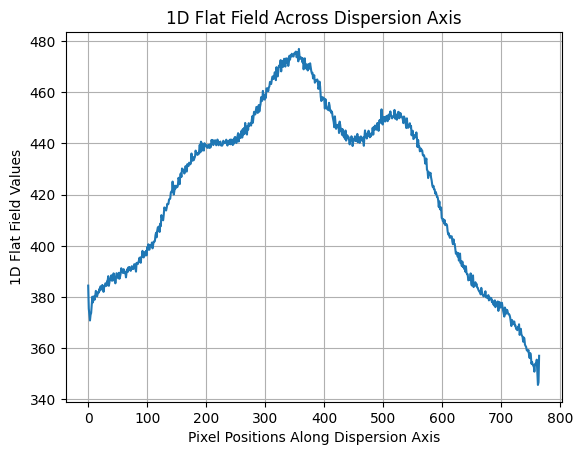

In [79]:
# Calculate the 1D flat field values by averaging along the y-axis
flat_field_1d = np.mean(median_values, axis=0)

# Plotting the 1D flat field values against pixel positions along the dispersion axis
dispersion_axis = np.arange(765) 

plt.plot(dispersion_axis, flat_field_1d)
plt.xlabel('Pixel Positions Along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('1D Flat Field Across Dispersion Axis')
plt.grid(True)
plt.show()

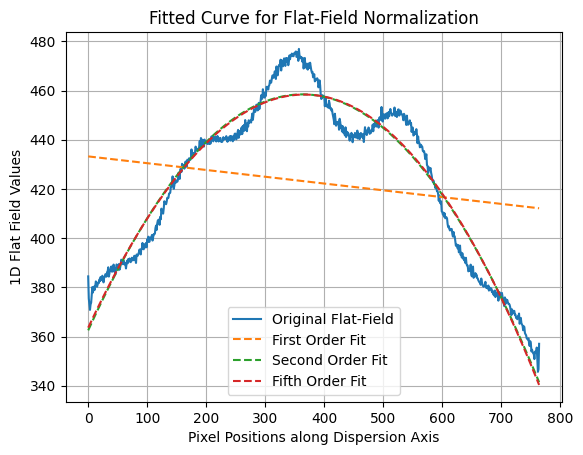

In [80]:
from astropy.modeling import models, fitting

# Pixel positions along the dispersion axis
dispersion_axis = np.arange(765)  # Assuming 765 is the length of the dispersion axis

# Initialize various polynomial models for fitting
first_order = models.Polynomial1D(degree=1)
second_order = models.Polynomial1D(degree=2)
fifth_order = models.Polynomial1D(degree=5)


# Initialize a fitting algorithm
fitter = fitting.LinearLSQFitter()

# Fit the models to the observed 1D flat-field spectrum
first_fit = fitter(first_order, dispersion_axis, flat_field_1d)
second_fit = fitter(second_order, dispersion_axis, flat_field_1d)
fifth_fit = fitter(fifth_order, dispersion_axis, flat_field_1d)

# Generate the fits using the fitted model
first_fit_curve = first_fit(dispersion_axis)
second_fit_curve = second_fit(dispersion_axis)
fifth_fit_curve = fifth_fit(dispersion_axis)

# Plot the original flat-field and the fitted curves
plt.plot(dispersion_axis, flat_field_1d, label='Original Flat-Field')
plt.plot(dispersion_axis, first_fit(dispersion_axis), label='First Order Fit', linestyle='--')
plt.plot(dispersion_axis, second_fit(dispersion_axis), label='Second Order Fit', linestyle='--')
plt.plot(dispersion_axis, fifth_fit(dispersion_axis), label='Fifth Order Fit', linestyle='--')
plt.xlabel('Pixel Positions along Dispersion Axis')
plt.ylabel('1D Flat Field Values')
plt.title('Fitted Curve for Flat-Field Normalization')
plt.legend()
plt.grid(True)
plt.show()

# Divide the 2D flat-field by the fits to obtain the normalized flat-field
first_normalized_flat_field = median_values / first_fit_curve
second_normalized_flat_field = median_values / second_fit_curve
fifth_normalized_flat_field = median_values / fifth_fit_curve

Text(0.5, 1.0, 'Original')

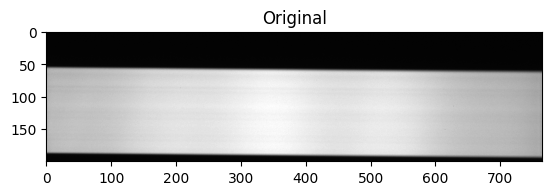

In [81]:
plt.imshow(crop,cmap='gray')
plt.title('Original')

Text(0.5, 1.0, 'First Order Fit')

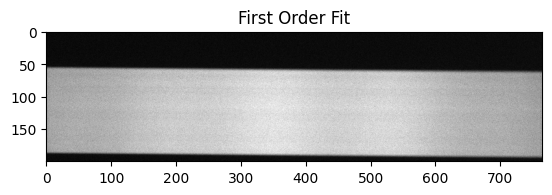

In [82]:
plt.imshow(first_normalized_flat_field,cmap='gray')
plt.title('First Order Fit')

Text(0.5, 1.0, 'Second Order Fit')

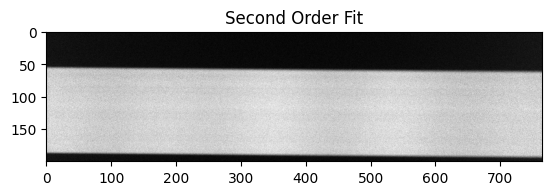

In [83]:
plt.imshow(second_normalized_flat_field,cmap='gray')
plt.title('Second Order Fit')

Text(0.5, 1.0, 'Fifth Order Fit')

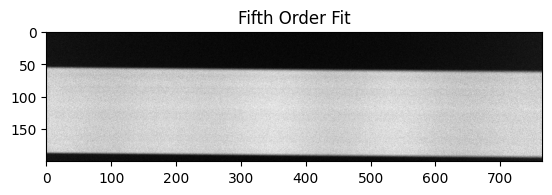

In [84]:
plt.imshow(fifth_normalized_flat_field,cmap='gray')
plt.title('Fifth Order Fit')

It seems as though the higher the order of the fit, the more evenly "lit" the image becomes.